In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob
import zipfile

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content/"

In [ ]:
!chmod -600 "/content/kaggle.json"

In [ ]:
!kaggle datasets download -d adityajn105/flickr8k

 99% 1.03G/1.04G [00:07<00:00, 161MB/s]
100% 1.04G/1.04G [00:07<00:00, 148MB/s]


In [ ]:
zip_ref = zipfile.ZipFile("/content/flickr8k.zip")
zip_ref.extractall()
zip_ref.close()

# **image Preprocess**

In [ ]:
images_path = '/content/Images/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [ ]:
# images = list(os.listdir("/content/Images"))

In [ ]:
len(images)

8091

In [ ]:
images[:5]

['/content/Images/975131015_9acd25db9c.jpg',
 '/content/Images/2676764246_c58205a365.jpg',
 '/content/Images/3350671534_2a5d45a961.jpg',
 '/content/Images/3450874870_c4dcf58fb3.jpg',
 '/content/Images/1012212859_01547e3f17.jpg']

In [ ]:
# import matplotlib.pyplot as plt

# for i in range(5):
#     plt.figure()
#     img = cv2.imread(images[i])
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.imshow(img)

In [ ]:
from tensorflow.keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

In [ ]:
from tensorflow.keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
modele.save("modele.h5")

In [ ]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count +=1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [ ]:
len(images_features)

1500

# **Text Preprocess**

In [ ]:
caption_path = '/content/captions.txt'

In [ ]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
len(captions)

40457

In [ ]:
captions[:5]

['image,caption',
 '1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .']

In [ ]:
captions[1:10]

['1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .']

In [ ]:
captions_dict = {}

for i in captions[1:]:
    try:
        img_name = i.split(',')[0]
        caption = i.split(',')[1]
        # print(img_name)
        # print(caption)
        if img_name not in captions_dict:
            captions_dict[img_name] = [caption]  
        else:
            captions_dict[img_name].append(caption)     
    except:
        pass

In [ ]:
len(captions_dict)

8091

In [ ]:
captions_dict["1001773457_577c3a7d70.jpg"]

['A black dog and a spotted dog are fighting',
 'A black dog and a tri-colored dog playing with each other on the road .',
 'A black dog and a white dog with brown spots are staring at each other in the street .',
 'Two dogs of different breeds looking at each other on the road .',
 'Two dogs on pavement moving toward each other .']

# **Visualize Images with captions**

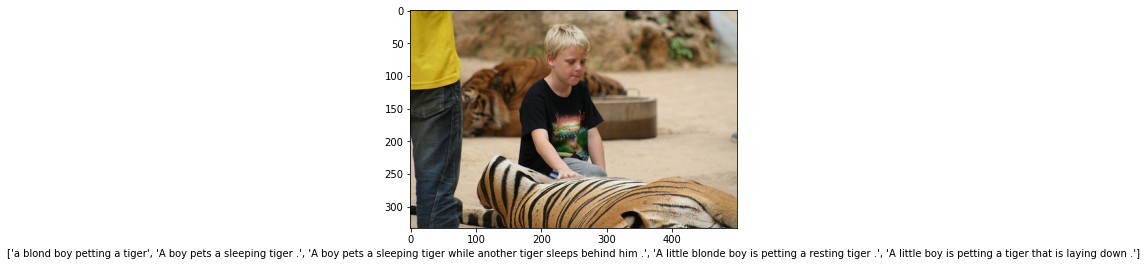

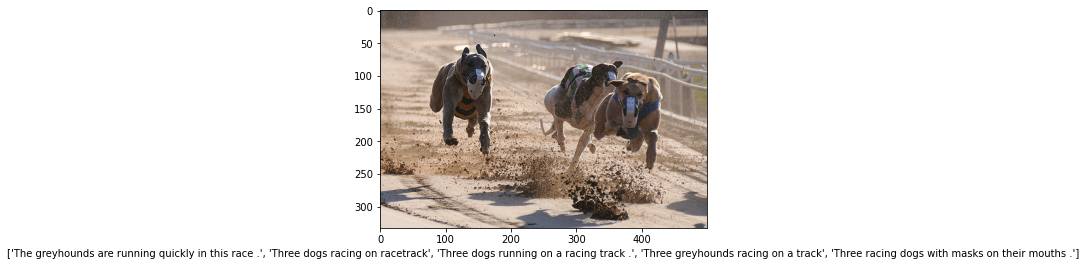

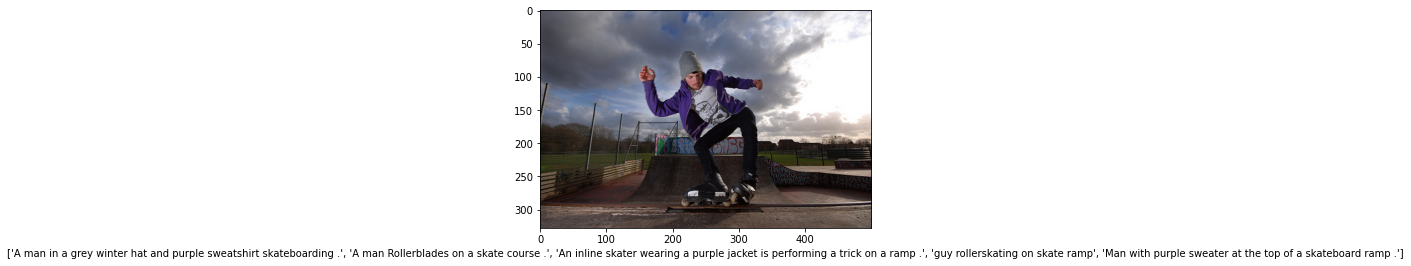

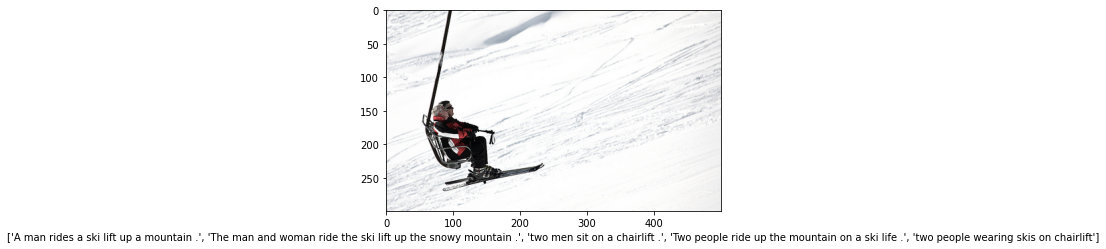

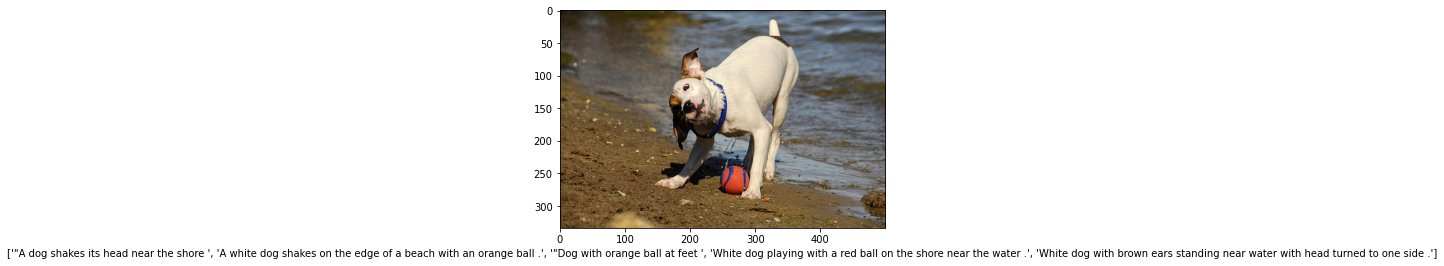

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

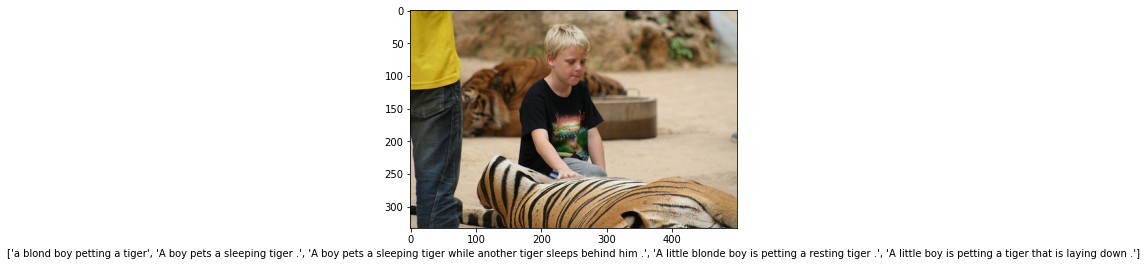

In [ ]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = '/content/Images/' + k
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [ ]:

def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified
    

In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

# **Create Vocabulary**

In [ ]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [ ]:
len(count_words)

8873

In [ ]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1
        

In [ ]:
len(new_dict)

8873

In [ ]:
new_dict['<OUT>'] = len(new_dict) 

In [ ]:
captions_backup = captions_dict.copy()

In [ ]:
captions_dict = captions_backup.copy()

In [ ]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [ ]:
captions_dict

{'1000268201_693b08cb0e.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   2,
   10,
   11,
   12,
   4,
   13,
   14,
   15,
   16,
   17],
  [1, 2, 18, 19, 20, 2, 21, 22, 16, 17],
  [1, 2, 23, 18, 8, 20, 2, 21, 24, 16, 17],
  [1, 2, 23, 18, 8, 25, 12, 26, 27, 24, 16, 17],
  [1, 2, 23, 18, 4, 2, 5, 6, 19, 20, 2, 21, 28, 16, 17]],
 '1001773457_577c3a7d70.jpg': [[1, 2, 29, 30, 31, 2, 32, 30, 33, 34, 17],
  [1, 2, 29, 30, 31, 2, 35, 30, 36, 37, 38, 39, 40, 25, 41, 16, 17],
  [1,
   2,
   29,
   30,
   31,
   2,
   42,
   30,
   37,
   43,
   44,
   33,
   45,
   46,
   38,
   39,
   4,
   25,
   47,
   16,
   17],
  [1, 48, 49, 11, 50, 51, 52, 46, 38, 39, 40, 25, 41, 16, 17],
  [1, 48, 49, 40, 53, 54, 55, 38, 39, 16, 17]],
 '1002674143_1b742ab4b8.jpg': [[1,
   2,
   23,
   18,
   56,
   4,
   57,
   58,
   4,
   59,
   11,
   2,
   60,
   61,
   37,
   27,
   62,
   4,
   2,
   63,
   16,
   17],
  [1, 2, 23, 18, 7, 64, 4, 59, 11, 2, 65, 60, 61, 16, 17],
  [1,
   2,
   6

------------------------------------------------------------------------------------------------------

# **Build Generator Function**

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 2, 5, 6, 7, 8, 9, 2, 10, 11, 12, 4, 13, 14, 15, 16, 17]
[1, 2, 29, 30, 31, 2, 42, 30, 37, 43, 44, 33, 45, 46, 38, 39, 4, 25, 47, 16, 17]
[1, 2, 23, 18, 56, 4, 57, 58, 4, 59, 11, 2, 60, 61, 37, 27, 62, 4, 2, 63, 16, 17]
[1, 2, 66, 18, 4, 25, 67, 68, 37, 69, 4, 59, 11, 2, 42, 70, 37, 2, 61, 40, 71, 16, 17]
[1, 2, 77, 7, 93, 25, 246, 11, 2, 236, 9, 26, 81, 225, 4, 59, 11, 398, 338, 80, 186, 77, 190, 40, 16, 17]
[1, 2, 77, 4, 142, 563, 2, 23, 147, 9, 4, 25, 229, 31, 587, 193, 83, 26, 588, 387, 589, 294, 106, 218, 83, 16, 17]
[1, 25, 18, 4, 25, 650, 584, 651, 7, 143, 88, 26, 48, 75, 198, 652, 145, 7, 103, 2, 29, 653, 31, 25, 39, 7, 654, 655, 16, 17]
[1, 2, 77, 4, 2, 29, 162, 31, 164, 295, 947, 2, 236, 4, 29, 289, 31, 2, 1128, 162, 4, 59, 11, 2, 1127, 351, 37, 950, 156, 221, 16, 17]
[1, 2, 18, 4, 2, 112, 31, 29, 1460, 37, 42, 1239, 7, 143, 88, 26, 2, 77, 4, 2, 883, 31, 2, 18, 4, 2, 544, 5, 31, 29, 31, 42, 1461, 653, 16, 17]


In [ ]:
MAX_LEN

36

In [ ]:
captions_dict

{'1000268201_693b08cb0e.jpg': [[1,
   2,
   3,
   4,
   2,
   5,
   6,
   7,
   8,
   9,
   2,
   10,
   11,
   12,
   4,
   13,
   14,
   15,
   16,
   17],
  [1, 2, 18, 19, 20, 2, 21, 22, 16, 17],
  [1, 2, 23, 18, 8, 20, 2, 21, 24, 16, 17],
  [1, 2, 23, 18, 8, 25, 12, 26, 27, 24, 16, 17],
  [1, 2, 23, 18, 4, 2, 5, 6, 19, 20, 2, 21, 28, 16, 17]],
 '1001773457_577c3a7d70.jpg': [[1, 2, 29, 30, 31, 2, 32, 30, 33, 34, 17],
  [1, 2, 29, 30, 31, 2, 35, 30, 36, 37, 38, 39, 40, 25, 41, 16, 17],
  [1,
   2,
   29,
   30,
   31,
   2,
   42,
   30,
   37,
   43,
   44,
   33,
   45,
   46,
   38,
   39,
   4,
   25,
   47,
   16,
   17],
  [1, 48, 49, 11, 50, 51, 52, 46, 38, 39, 40, 25, 41, 16, 17],
  [1, 48, 49, 40, 53, 54, 55, 38, 39, 16, 17]],
 '1002674143_1b742ab4b8.jpg': [[1,
   2,
   23,
   18,
   56,
   4,
   57,
   58,
   4,
   59,
   11,
   2,
   60,
   61,
   37,
   27,
   62,
   4,
   2,
   63,
   16,
   17],
  [1, 2, 23, 18, 7, 64, 4, 59, 11, 2, 65, 60, 61, 16, 17],
  [1,
   2,
   6

In [ ]:
Batch_size = 128
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
      if k in photo:
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
        else:
          continue
            
    return X, y_in, y_out

In [ ]:
X, y_in, y_out = generator(images_features, captions_dict)

In [ ]:
len(X), len(y_in), len(y_out)

(91929, 91929, 91929)

In [ ]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')



In [ ]:
X.shape, y_in.shape, y_out.shape

((91929, 2048), (91929, 36), (91929, 8874))

In [ ]:
X[1510]

array([0.35118294, 1.9686184 , 0.11907402, ..., 0.3161688 , 0.59525406,
       0.01417492], dtype=float32)

In [ ]:
y_in[1515]

array([  1.,   2., 613., 103.,   2., 548.,  93.,   2.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.])

# **MODEL**

In [ ]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import add
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from tensorflow.keras.models import Sequential, Model

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 36, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 36, 128)           1135872   
                                                                 
 lstm (LSTM)                 (None, 36, 256)           394240    
                            

In [ ]:
model.fit([X, y_in], y_out, batch_size=128, epochs=50)

Epoch 1/50
719/719 [==============================] - 29s 30ms/step - loss: 5.2112 - accuracy: 0.1415
Epoch 2/50
719/719 [==============================] - 21s 29ms/step - loss: 4.5604 - accuracy: 0.2403
Epoch 3/50
719/719 [==============================] - 21s 29ms/step - loss: 4.2884 - accuracy: 0.2737
Epoch 4/50
719/719 [==============================] - 21s 29ms/step - loss: 3.9445 - accuracy: 0.3142
Epoch 5/50
719/719 [==============================] - 21s 29ms/step - loss: 3.7233 - accuracy: 0.3383
Epoch 6/50
719/719 [==============================] - 21s 29ms/step - loss: 3.5932 - accuracy: 0.3551
Epoch 7/50
719/719 [==============================] - 21s 29ms/step - loss: 3.4803 - accuracy: 0.3678
Epoch 8/50
719/719 [==============================] - 21s 29ms/step - loss: 3.3901 - accuracy: 0.3798
Epoch 9/50
719/719 [==============================] - 21s 29ms/step - loss: 3.3111 - accuracy: 0.3888
Epoch 10/50
719/719 [==============================] - 21s 29ms/step - loss: 3.244

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

In [ ]:
model.save('model.h5')

In [ ]:
model.save_weights('mine_model_weights.h5')

In [ ]:
np.save('vocab.npy', new_dict)

In [ ]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

# **Predictions**

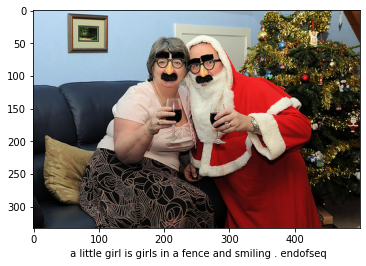

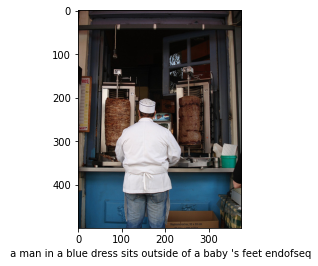

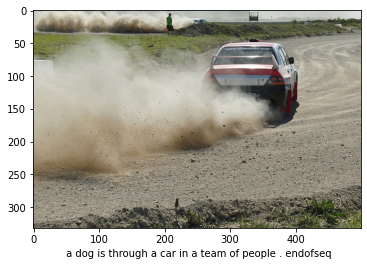

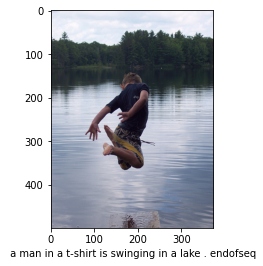

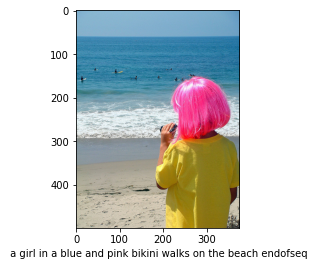

In [ ]:
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)